<h1 style="text-align: center; color: purple;" markdown="1">Final Project "Crime Time:" An Analysis of the Factors Influencing Criminal Activity in the USA </h1>

<h2 style="text-align: center; color: #012169" markdown="1">Angela Choksi, Lauren Stekler, Yuritzy Ramos, Rhea Nair </h2>

<h3 style="text-align: center; color: #012169" markdown="1">December 6, 2021 </h3>

# Table of Contents
* [Introduction & Motivation](#anchor1) 
    * [Purpose of the Study](#anchor2)
    * [Relevant Literature Review](#anchor3)
    * [Research Questions](#anchor4)
    * [Preliminary Hypotheses](#anchor5)
* [Data](#anchor6)
    * [The Data Gathering Process](#anchor7)
    * [The Data Cleaning Process](#anchor8)
    * [Summary Statistics](#anchor9)
        * [Exploring the Characteristics of the Data](#anchor10)
    * [Graphs](#anchor11)
        * [Scatterplot 1: Wage vs Crime Rate by State Size](#anchor12)
        * [Scatterplot 2: The Prevalence of Youth vs Crime Rate](#anchor13)
        * [Scatterplot 3: Youth Labor Force Participation vs Crime Rate](#anchor14)
        * [Boxplot 1: Education Level by Geographic Region](#anchor15)
    * [Tables](#anchor16)
        * [Table 1: Average Crime Rate by Southern State Status](#anchor17)
        * [Table 2: Averages and Standard Deviations of Significant Variables by Southern State Status](#anchor18)
* [Methodology & Empirical Model](#anchor19)
    * [Regression Equation 1](#anchor20)
    * [Regression Equation 2](#anchor21)
* [Data Analysis](#anchor22)
    * [Testing for Heteroskedasticity](#anchor23)
    * [Inference & Statistical Testing](#anchor24)
        * [F-Tests](#anchor25)
        * [Overall Significance Tests](#anchor26)
        * [Qualitative Variables & Variable Interactions](#anchor27) 
    * [Final Regression Equation](#anchor28)
* [Conclusion](#anchor29)
    * [Summary of Findings & Results](#anchor30)
    * [Final Reflections](#anchor31)
    * [Limitations & Shortcomings](#anchor32)
    * [Future Revisions & Additions](#anchor33)
* [Bibliography](#anchor34)

In [1]:
# Import necessary packages
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm
import patsy as pt
import scipy.stats as stats

from stargazer.stargazer import Stargazer
from IPython.core.display import HTML

import warnings # In case non-critical warnings appear, which could affect the legibility of the document

# Introduction & Motivation <a class = anchor id = anchor1></a>

"Any crime rate is too high" ~ Michael Bloomberg

## Purpose of the Study <a class = anchor id = anchor2></a>

Criminal activity is a ubiquitous occurrence in our daily lives today. From rape to burglary, grand theft auto, and murder, crime includes any unlawful and illegal act punishable by a state or national authority. The mainstream media including TV, social media platforms, and the radio, plays a large role in exposing us to crimes occurring around our country, and the world. Each individual has an opinion and a perception about the crime rate in his or her state, community, country, town, and neighborhood. However, oftentimes, the data contradicts one's beliefs about the criminal activity in their area, and the factors that influence crime. 

In this project, we aim to shed light on the elements that influence criminal activity in US states in order to hopefully better inform our societies. Specifically, we want to dissect whether the level of education in a state, the prevalence or population of youths in a state, the average wage or income in a state, and the size of a state, have an impact on the criminal activity in it. Furthermore, we also aim to discern whether crime is more prevalent in Southern or non-Southern states. 

Additionally, despite our data set including 13 independent variables, we chose to focus on those mentioned above, since we believe those to be the most relevant to our communities, and because they are the most easily understandable to the average person.

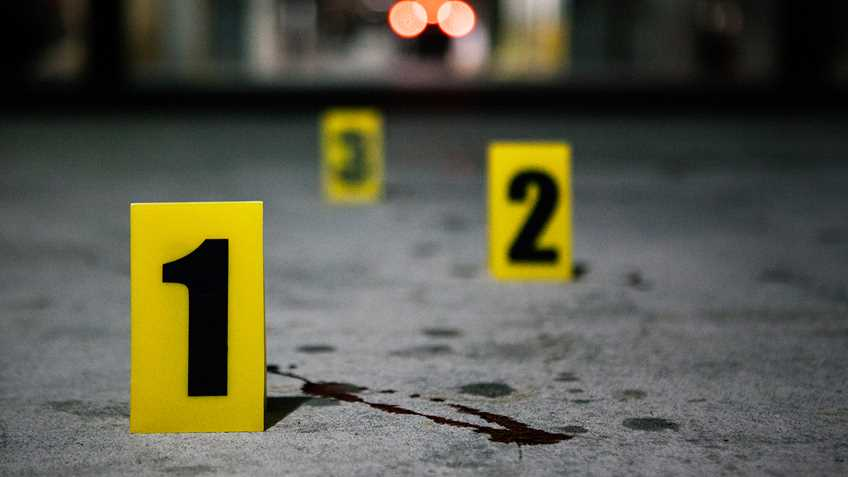

## Relevant Literature Review <a class = anchor id = anchor3></a>

**According to John Gramlich of the *Pew Research Center*:**
- Federal Bureau of Investigation (FBI) and Bureau of Justice Statistics (BJS) data show dramatic declines in U.S. violent and property crime rates since the early 1990s, when crime spiked across much of the nation. 
- Specifically, the violent crime rate fell 49% between 1993 and 2019, and the property crime rate fell 55%.

**According to David A. Graham of The *Atlantic*:**
- A historic rise in homicides in 2020—and continued bloodshed in 2021—has incited fears that after years of plummeting crime rates, the U.S. could be headed back to the bad old days, when a crime wave gripped the country from the 1970s to the 1990s.
- The FBI’s “Uniform Crime Report” for 2020 suggests that even as violent crime rose, led by significant jumps in murders and aggravated assaults, property crime continued a years-long decline.
- The murder rate rose by nearly 30%, the largest increase on record. There were about 21,500 murders, or 6.5 per 100,000 people. 
- Aggravated assault, the most common form of violent crime, rose 12%. 

**According to Jake Horton of *BBC News*:**
- Across the US, there were 25% more murders recorded in 2020 than the previous year, which is still far lower than than in the early 1990s, when it was almost double the current figure.

**According to Jeff Asher of *The New York Times*:**
- *The New York Times* looked at 37 cities across the US with data for the first three months of 2021, and overall, there has been an an 18% increase in murders compared with the same time period in 2020.

Interestingly, despite the decline in crime across the nation, **Americans tend to believe crime is up, even when the data shows it is down**. According to Gramlich, "In 20 of 24 Gallup surveys conducted since 1993, at least 60% of U.S. adults have said there is more crime nationally than there was the year before, but not in their *own communities*...the gap between the share of Americans who say crime is up nationally and the share who say it is up locally (78% vs. 38%) [in 2020] is the widest Gallup has ever recorded."

**According to Maggie Koerth and Amelia Thomson-DeVeaux of *FiveThirtyEight*:**
- Across 1994 - 2004, survey respondents put their chance of being robbed in the coming year at about 15%, while the actual rate of robbery was 1.2%.
- In 2020, murder has been up but other crimes are in decline so that the crime rate, overall, is down. 

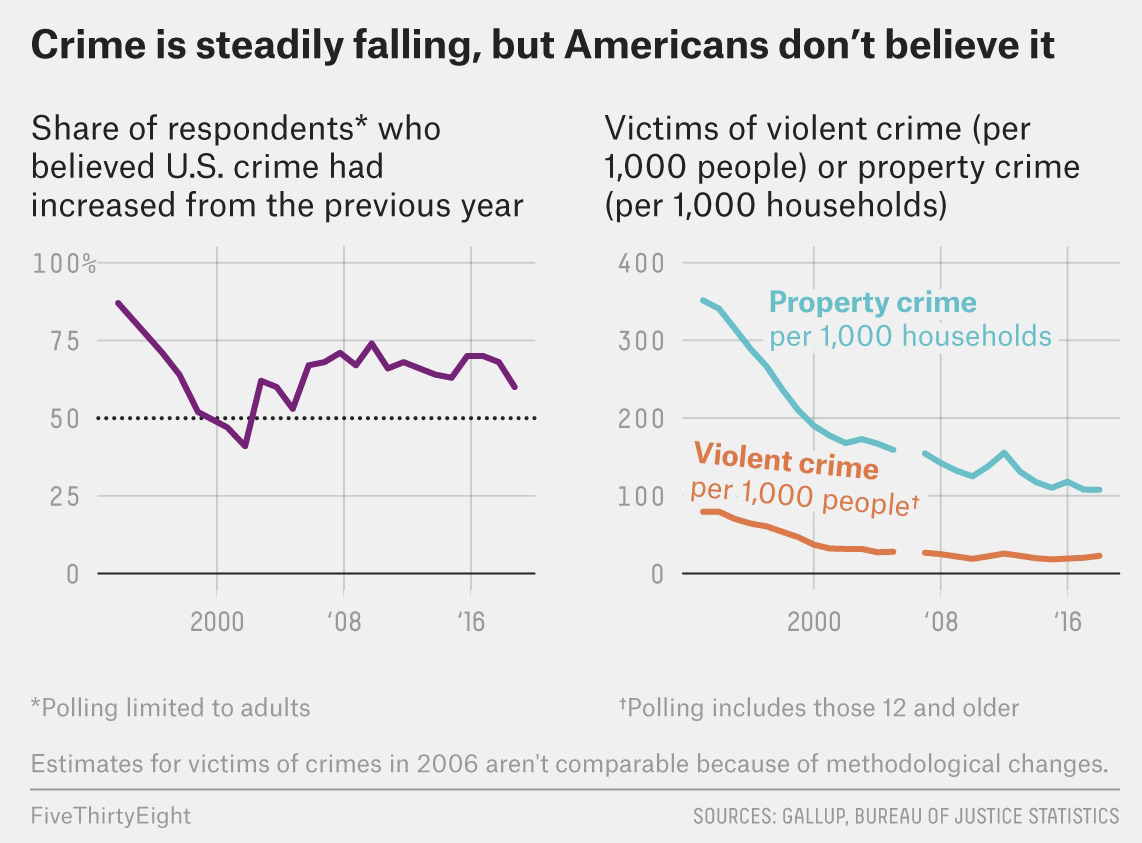

**Additionally, according to a 2019 BJS survey reported by John Gramlich of the *Pew Research Center*:**
- Younger people and those with lower incomes were far more likely to report being victimized than older and higher-income people. 
- There were no major differences in victimization rates between male and female respondents or between those who identified as White, Black or Hispanic. 
- The victimization rate among Asian Americans was substantially lower than among other racial and ethnic groups.
- Those who are male, younger people and those who are Black accounted for considerably larger shares of perceived offenders in violent incidents than their respective shares of the U.S. population. 
- In 2019, only 40.9% of violent crimes and 32.5% of household property crimes were reported to authorities.

## Research Questions <a class = anchor id = anchor4></a>

Based on our literature review, we propose the following research questions:

**1. Do education levels have an impact on crime rates in US states? If yes, how?**

**2. Does the prevalence or population of youths have an impact on crime rates in US states? If yes, how?**

**3. Does state size have an impact on crime rates in US states? If yes, how?**

**4. Do wages have an impact on crime rates in US states? If yes, how?**

## Preliminary Hypotheses <a class = anchor id = anchor5></a>

Based on the research questions posed, and our literature review findings, we propose the following hypotheses:

**1. The higher the level of education in a state, the lower its crime rate.**

**2. The larger the prevalance or population of youths in a state, the higher its crime rate.**

**3. The larger the state size, the higher its crime rate.**

**4. The higher the average wage in a state, the lower its crime rate.** 

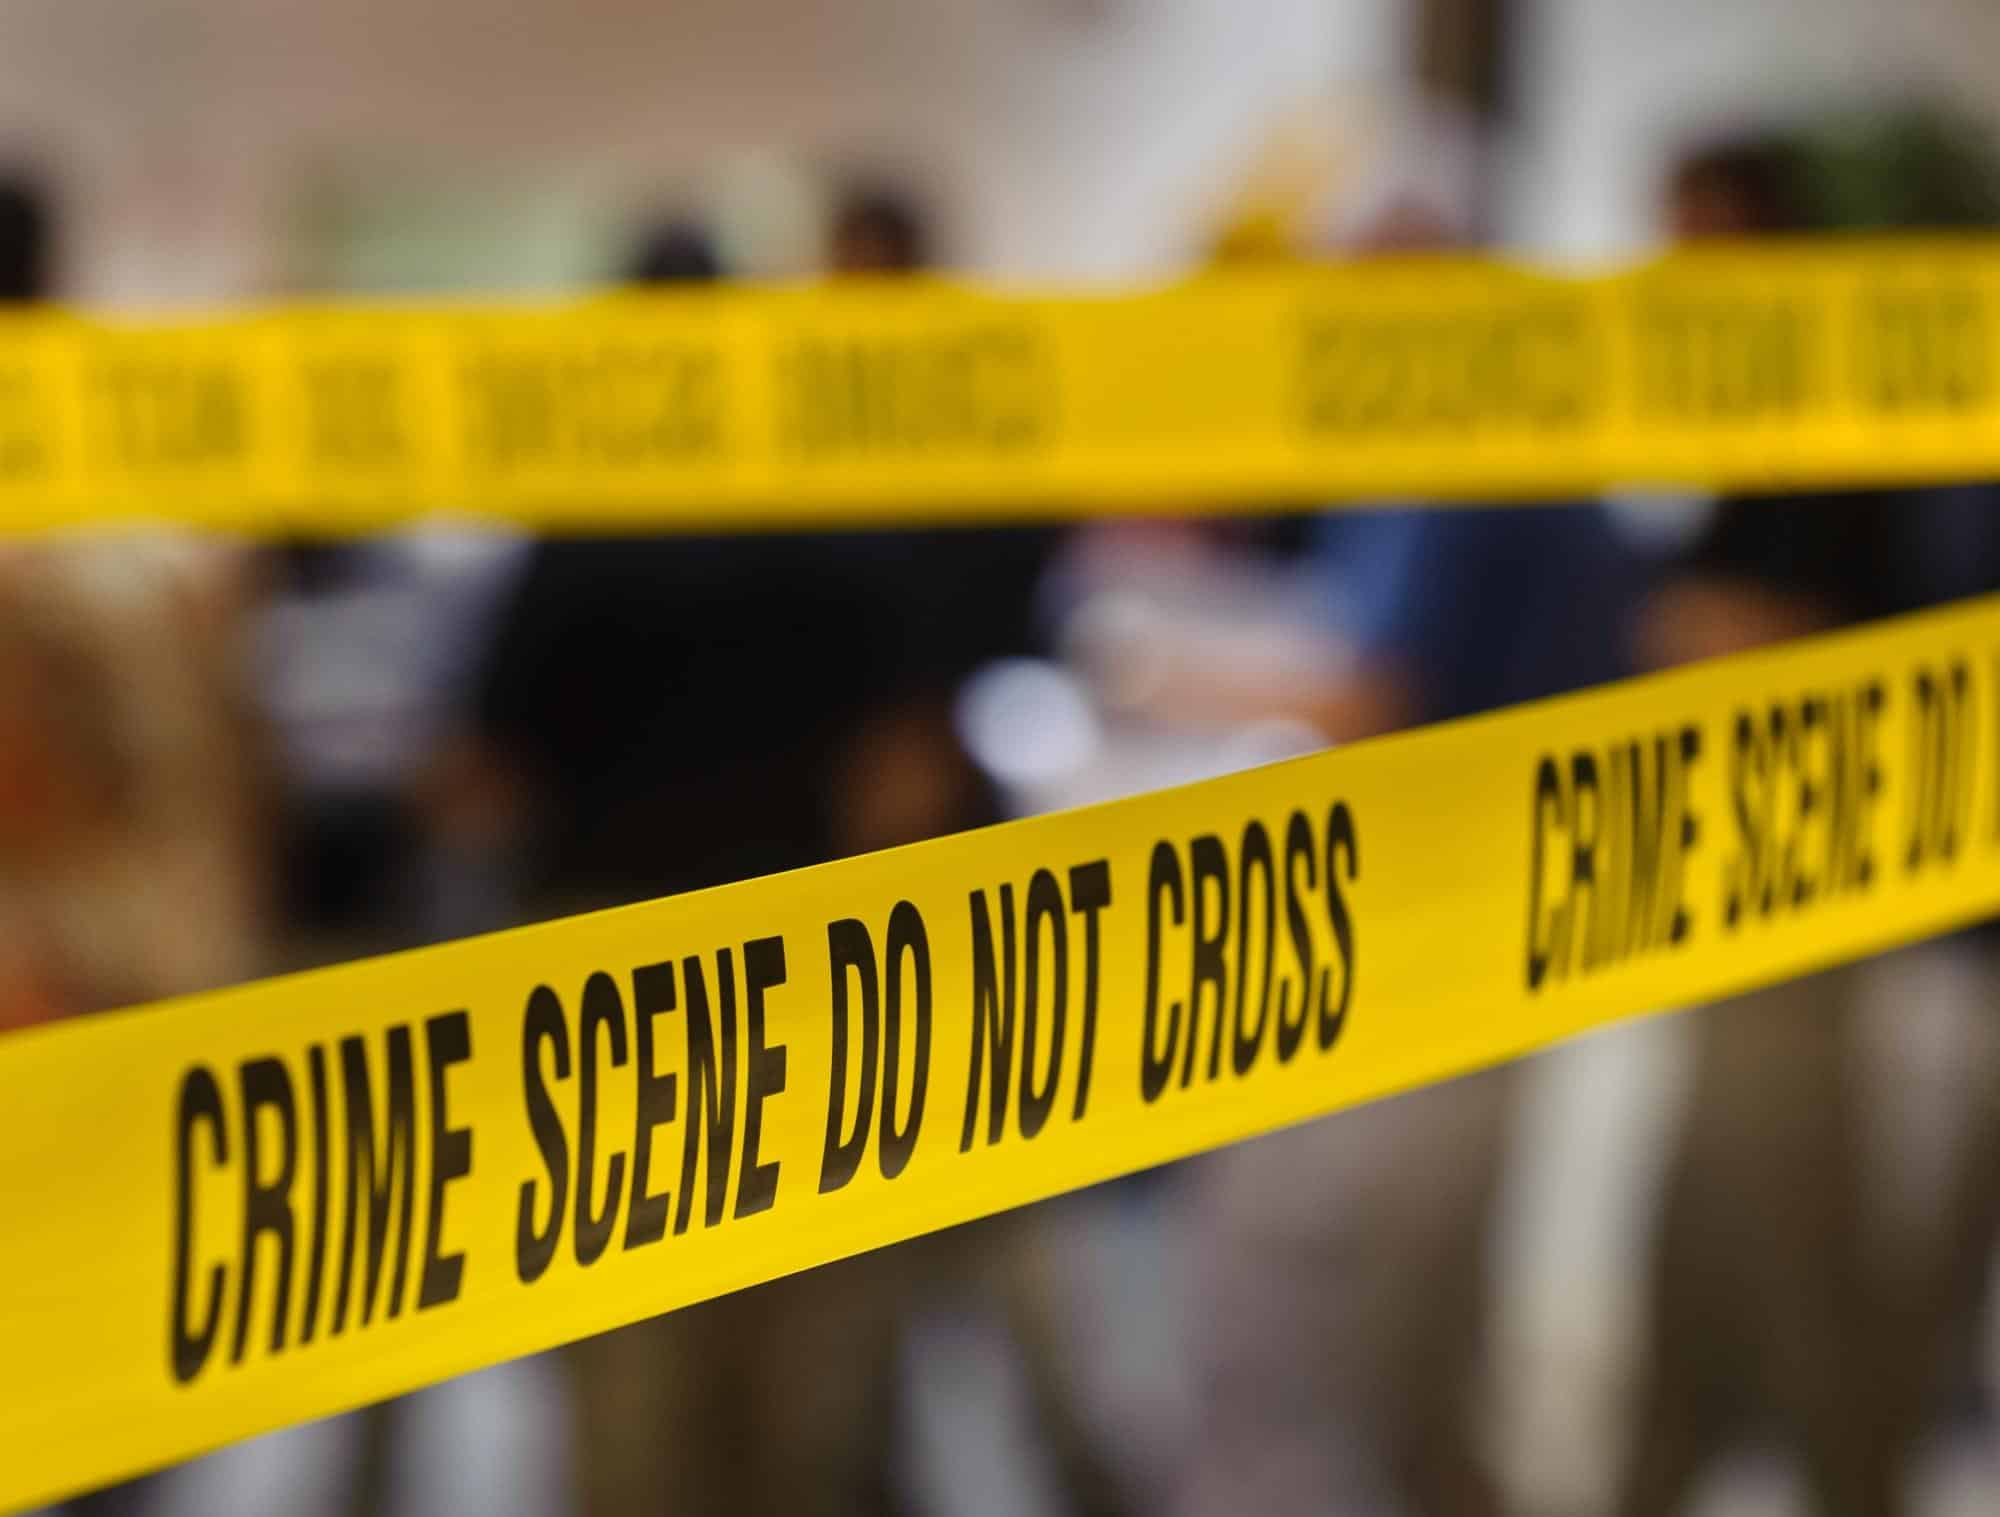

# Data <a class = anchor id = anchor6></a>

In this project, we will be using the [Crime_R](https://www.sheffield.ac.uk/mash/statistics/datasets) data set which contains the crime rate data for different states in the United States. For the interest of our project, the variables that will be used include: 

* Youth = Number of young males aged 18 - 24 per 1,000 individuals
* Education = Education time (average number of years of schooling up to 25)
* Southern = Whether the individual is from a Southern state or not
* Wage = Median weekly wage
* LabourForce = Youth in labour force (18 - 24 year old males employed per 1,000 individuals)
* StateSize = State size in hundred thousands
* MoreMales = If more males are identified for every 1,000 females
* BelowWage = The number of families below half wage per every 1,000
* HighYouthUnemploy: If there is 3 times more youth (18 - 24 years) unemployment than mature unemployment (35 - 39 years)

In [2]:
# Import data set 
crim = pd.read_csv("Crime_R.csv")

# Variables from our dataset that will be used in this study 
crime = crim[["CrimeRate", "Youth", "Education", "Southern", "Wage", "LabourForce", "StateSize", "HighYouthUnemploy", "MoreMales", "BelowWage"]]

### The Data Gathering Process <a class = anchor id = anchor7></a>

We procured our 'Crime' data set online from The University of Sheffield's 'Datasets for Teaching' page: https://www.sheffield.ac.uk/mash/statistics/datasets

### The Data Cleaning Process <a class = anchor id = anchor8></a>

Based on our analysis of our 'Crime' data set, it does not require any data cleaning.

## Summary Statistics <a class = anchor id = anchor9></a>

### Exploring the Characteristics of the Data <a class = anchor id = anchor10></a>

The summary statistics for the relevant variables can be found below:

In [3]:
# Summary statistics of selected data
crime.describe()

,CrimeRate,Youth,Education,Southern,Wage,LabourForce,StateSize,HighYouthUnemploy,MoreMales,BelowWage
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,102.808511,138.574468,12.391489,0.340426,525.382979,561.191489,36.617021,0.319149,0.191489,194.000000
std,28.893266,12.567634,1.120332,0.478975,96.490944,40.411814,38.071188,0.471186,0.397727,39.896061
min,45.500000,119.000000,10.000000,0.000000,288.000000,480.000000,3.000000,0.000000,0.000000,126.000000
25%,82.700000,130.000000,11.550000,0.000000,459.500000,530.500000,10.000000,0.000000,0.000000,165.500000
50%,103.000000,136.000000,12.400000,0.000000,537.000000,560.000000,25.000000,0.000000,0.000000,176.000000
75%,120.650000,146.000000,13.200000,1.000000,591.500000,593.000000,41.500000,1.000000,0.000000,227.500000
max,161.800000,177.000000,15.100000,1.000000,689.000000,641.000000,168.000000,1.000000,1.000000,276.000000


## Graphs <a class = anchor id = anchor11></a>

### Scatterplot 1: Wage vs Crime Rate by State Size <a class = anchor id = anchor12></a>

Based on the following scatterplot, crime rate seems to increase as wage and state size increase. Thus, based on the correlation coefficients below, crime rate is moderately positively correlated with wage and state size. 

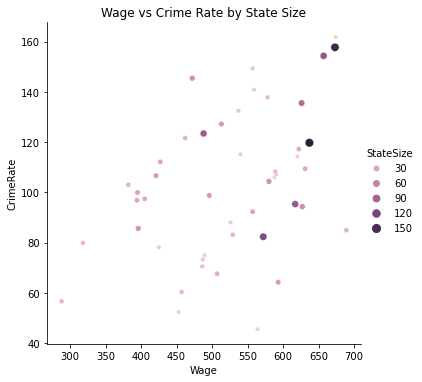

The correlation between wage and crime rate is 0.4248530127607085
The correlation between state size and crime rate is 0.30794545047506294


In [4]:
sns.relplot(x = "Wage", y = "CrimeRate", data = crime,
            kind = "scatter", hue = "StateSize", size = "StateSize")
plt.title("Wage vs Crime Rate by State Size")
plt.show()
print("The correlation between wage and crime rate is", np.corrcoef(crime["Wage"], crime["CrimeRate"])[0,1])
print("The correlation between state size and crime rate is", np.corrcoef(crime["StateSize"], crime["CrimeRate"])[0,1])

### Scatterplot 2: The Prevalence of Youth vs Crime Rate <a class = anchor id = anchor13></a>

Based on the scatterplot below, there appears to be no correlation between the prevalence or population of youths and the crime rate.

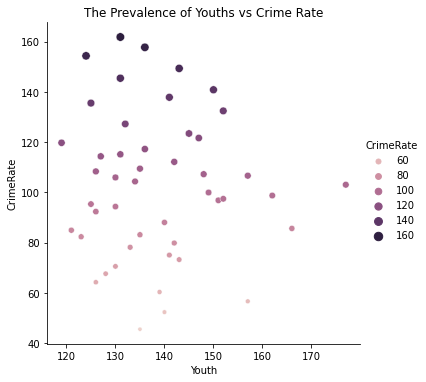

The correlation between the prevalence of youths and crime rate is -0.05500216904315741


In [5]:
sns.relplot(x = "Youth", y = "CrimeRate", data = crime, hue = "CrimeRate", size = "CrimeRate",
            kind = "scatter")
plt.title("The Prevalence of Youths vs Crime Rate")
plt.show()
print("The correlation between the prevalence of youths and crime rate is", np.corrcoef(crime["Youth"], crime["CrimeRate"])[0,1])

### Scatterplot 3: Youth Labor Force Participation vs Crime Rate <a class = anchor id = anchor14></a>

Based on the scatterplot below, there appears to be no correlation between youth labour force particpation levels and the crime rate.

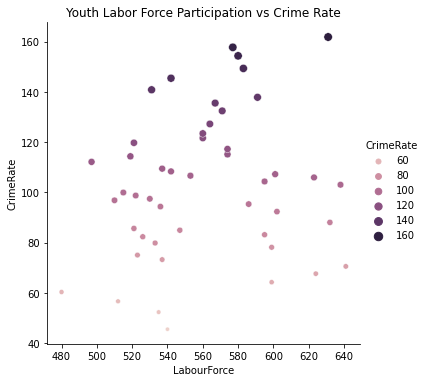

The correlation between youth labor force participation and crime rate is 0.16930856712298512


In [6]:
sns.relplot(x = "LabourForce", y = "CrimeRate", data = crime, hue = "CrimeRate", size = "CrimeRate",
            kind = "scatter")
plt.title("Youth Labor Force Participation vs Crime Rate")
plt.show()
print("The correlation between youth labor force participation and crime rate is", np.corrcoef(crime["LabourForce"], crime["CrimeRate"])[0,1])

### Boxplot 1: Education Level by Geographic Region  <a class = anchor id = anchor15></a>

As demonstrated in the box plots below, the level of education for individuals in non-Southern states is higher than that in Southern states.

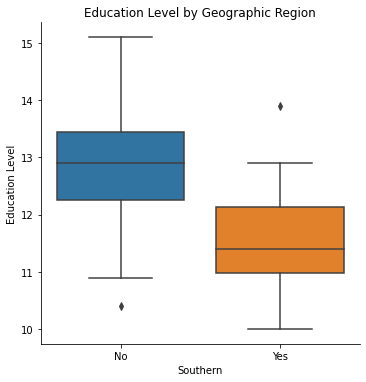

In [7]:
sns.catplot(x = "Southern", y = "Education", data = crime, kind = "box")
plt.title("Education Level by Geographic Region")
plt.xticks([0,1],["No", "Yes"])
plt.ylabel("Education Level")
plt.show()

## Tables <a class = anchor id = anchor16></a>

### Table 1: Average Crime Rate by Southern State Status <a class = anchor id = anchor17></a>

Elaborating on the differences between Southern states and non-Southern states, the following frequency table shows that non-Southern states demonstrate a higher crime rate on average, as well as a higher maximum crime rate compared to Southern states.

In [8]:
crime.pivot_table(values = "CrimeRate", index = "Southern", 
                  aggfunc = [np.mean, np.max, np.min])             

,mean,amax,amin
,CrimeRate,CrimeRate,CrimeRate
Southern,,,
0,103.906452,161.8,45.5
1,100.681250,145.4,56.6


### Table 2: Averages and Standard Deviations of Significant Variables by Southern State Status <a class = anchor id = anchor18></a>

The table below illustrates that non-Southern states have a higher crime rate, higher youth labor force participation, higher wage, and lower youth population, on average, than Southern states. 

Furthermore, the standard deviation of the crime rate is higher in non-Southern versus Southern states, however, the standard deviation of the youth labor force participation, wage, and youth population is lower in non-Southern versus Southern states.

In [9]:
crime_t = crime.pivot_table(values = ["CrimeRate", "Wage", "Youth", "LabourForce"], index = "Southern", aggfunc = [np.mean])
crime_s = crime.pivot_table(values = ["CrimeRate","Wage", "Youth", "LabourForce"], index = "Southern", aggfunc = [np.std])

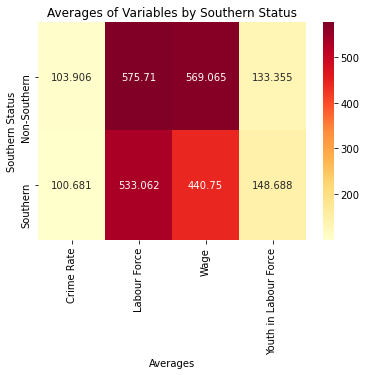

In [10]:
# Heat map of various variables of interest to our study 
sns.heatmap(crime_t, cmap = "YlOrRd", annot = True, xticklabels = ["Crime Rate","Labour Force", "Wage", "Youth in Labour Force"], yticklabels = ["Non-Southern", "Southern"],fmt = 'g').set(
title = "Averages of Variables by Southern Status", ylabel = "Southern Status", xlabel = "Averages");

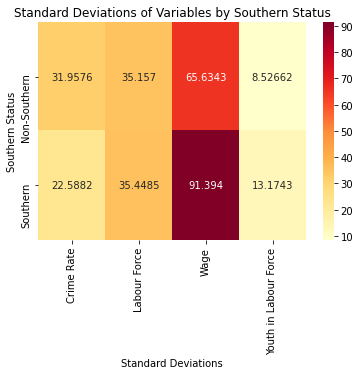

In [11]:
sns.heatmap(crime_s, cmap = "YlOrRd", annot = True, xticklabels = ["Crime Rate", "Labour Force", "Wage", "Youth in Labour Force"], yticklabels = ["Non-Southern", "Southern"], fmt = 'g').set(
title = "Standard Deviations of Variables by Southern Status", ylabel = "Southern Status", xlabel = "Standard Deviations");

# Methodology & Empirical Model <a class = anchor id = anchor19></a>

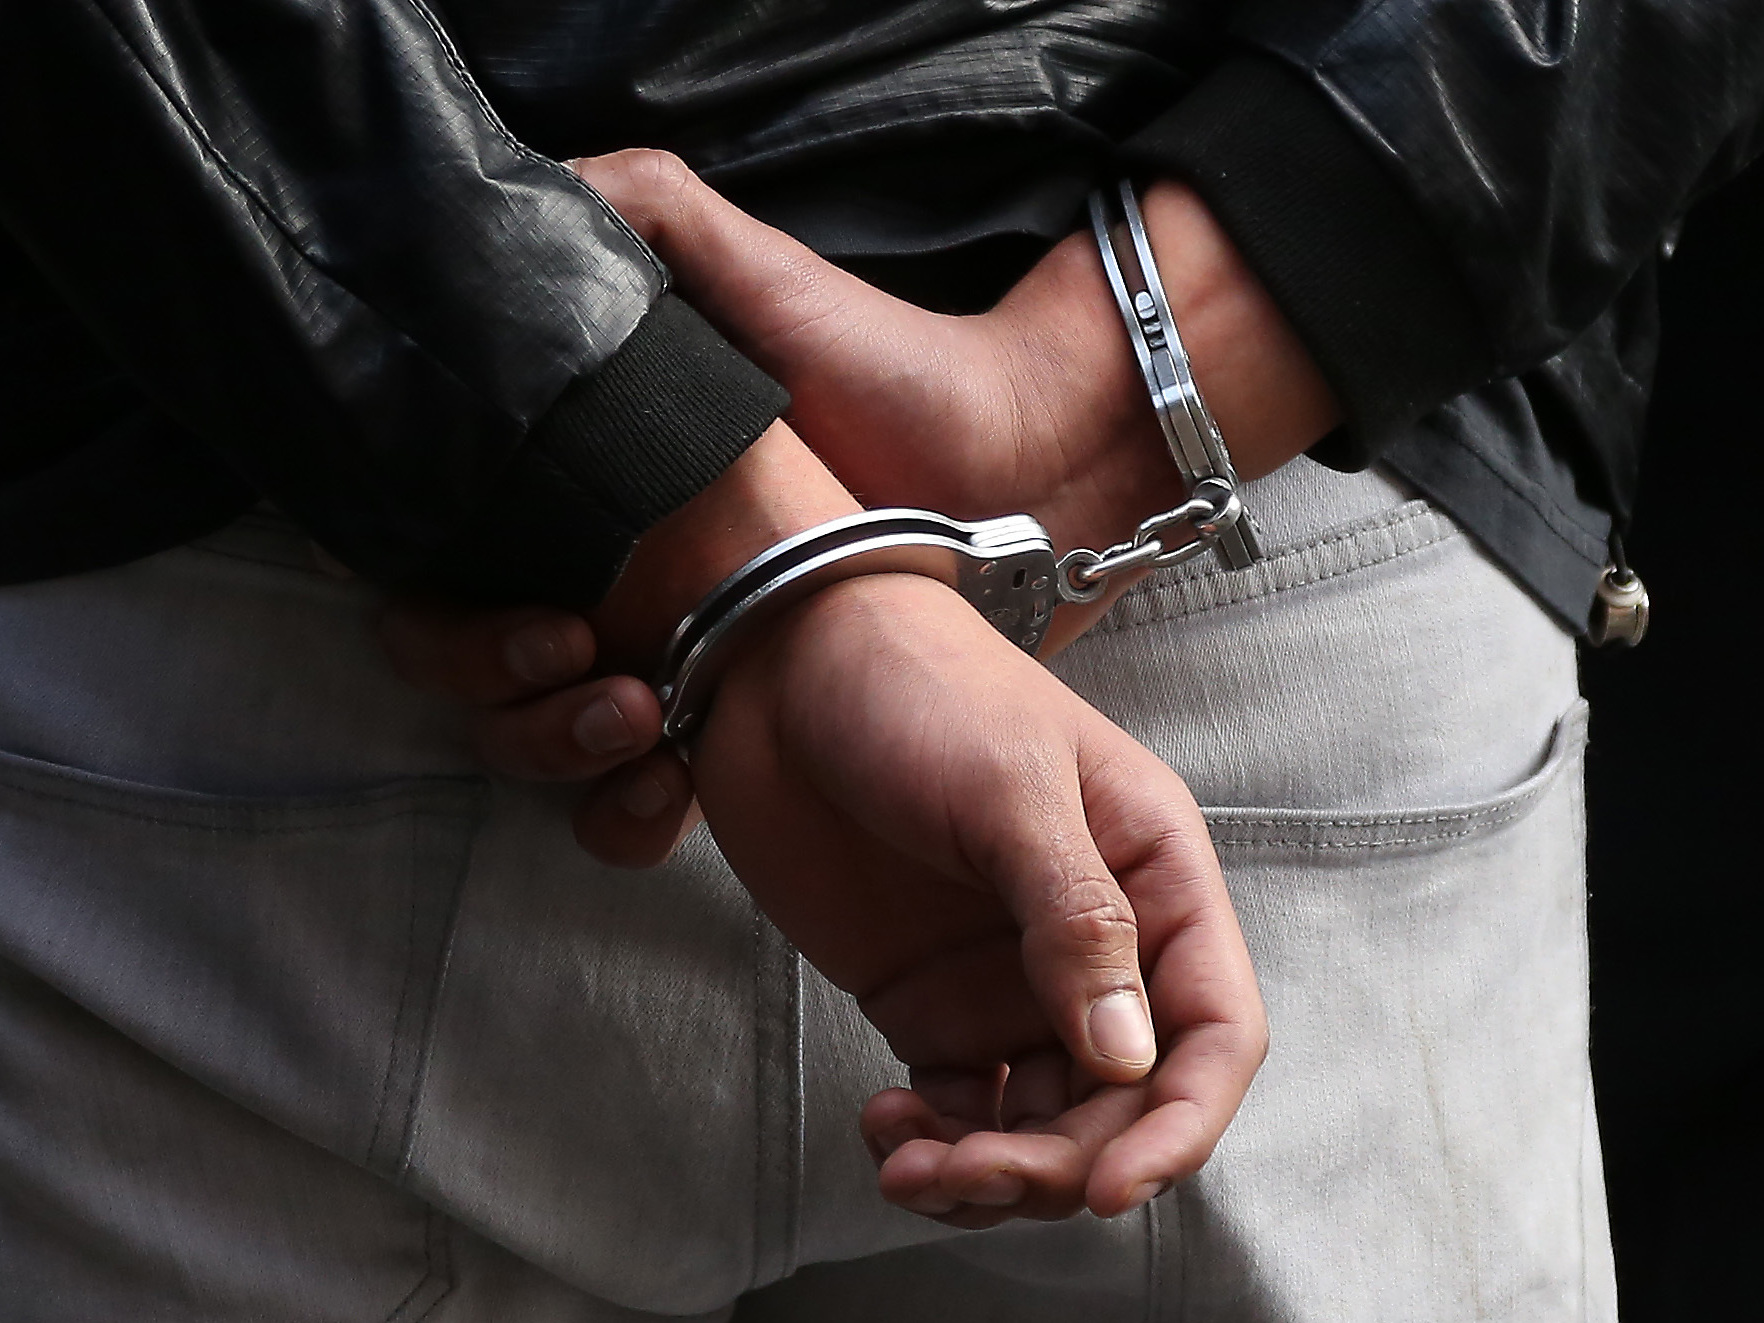

Using a cross-sectional approach, we examined the impact that education levels, state size, the prevalence or population of youths, youth labor force participation levels, and wages have on crime rates and outcomes for US states, through a multiple linear regression analysis.

We chose to dissect these particular explanatory variables, because we believe them to have the most relevant, and timely impact on the crime rate in the US.

Leveraging the five Gauss Markov Theorem assumptions, we found the OLS coefficients of our variables to examine the impact (or lack thereof) that each has on the crime rate. 

Furthermore, we are estimating two regression models to determine if our coefficient estimates change when we add more variables to the equation.

## Regression Equation 1 <a class = anchor id = anchor20></a>

$$CrimeRate = \beta_0 + \beta_1 Youth + \beta_2 Education + \beta_3 Wage + u$$ 

## Regression Equation 2 <a class = anchor id = anchor21></a>

$$CrimeRate = \beta_0 + \beta_1 Youth + \beta_2 Education + \beta_4 Wage + \beta_5 Youth Labor Force + \beta_6 State Size + u$$ 

In [12]:
reg1 = smf.ols(formula = 'CrimeRate ~ Youth + Education + Wage', data = crime).fit()

reg1.summary()

reg = smf.ols(formula = 'CrimeRate ~ Youth + Education + Wage + LabourForce +  StateSize', data = crime)

reg_default = reg.fit()

reg_default.summary()

# Putting all the results into a Stargazer Table 
models = Stargazer([reg1, reg_default])
models.covariate_order(['Intercept', 'Youth', 'Education', 'Wage', 'LabourForce','StateSize'])
HTML(models.render_html())

Based on the results in the table above, adding the 'LaborForce' and 'StateSize' variables reduced the Intercept by roughly 50. The coefficients of 'Youth,' 'Education,' and 'Wage' also changed from Regression Equation 1 to 2. The Youth coefficient changed the least, while the the Education coefficient increased by almost 0.5, and the Wage coefficient decreased by around 0.2. The standard errors, R-squared, and adjusted R-squared did not change significantly from Regression Equation 1 to 2.

# Data Analysis <a class = anchor id = anchor22></a>

## Testing for Heteroskedasticity <a class = anchor id = anchor23></a>

The general linear model requires an assumption of homoskedasticity, or that the variance of the error terms is unrelated to the regressors, i.e. 

$$Var(u|x_1, ..., x_k)=\sigma^2.$$ 

**Null Hypothesis:** $$H_0: Var(u|x_1, ..., x_k)=\sigma^2.$$

**Alternative Hypothesis:** The null hypothesis is not true, i.e., the variance is not constant, and heteroskedasticity is present.

If homoskedasticity is violated, then the standard errors are invalid, and all the inferences from the t, F, and other tests based on them, are unreliable. To prevent running a heteroskedastic model, we will compare the results of the simple regression with a model with heteroskedasticity-robust standard errors.

In [13]:
# Automatic BP test (LM version):
from statsmodels.compat import lzip
test = sms.het_breuschpagan(reg_default.resid, reg_default.model.exog)
name = ['Lagrange Multiplier statistic', 'p-value', 'f-value', 'f p-value']
pd.DataFrame(lzip(name, test))

,0,1
0,Lagrange Multiplier statistic,3.423177
1,p-value,0.635043
2,f-value,0.644151
3,f p-value,0.667390


A p-value of 0.66 indicates that we reject the null hypothesis $H_0$ of homoskedasticity. We will now estimate the model with heteroskedastic robust errors.

In [14]:
# Estimate the model with White SE:
reg_white = reg.fit(cov_type = 'HC0')

# Estimate the model with refined White SE:
reg_refined = reg.fit(cov_type = 'HC3') # red_refined is the robust standard error, which corrects for heteroskedasticity in the model

In [15]:
# Putting all the results in a Stargazer table 
models = Stargazer([reg_default, reg_white, reg_refined])
models.covariate_order(['Intercept', 'Youth', 'Education', 'Wage', 'LabourForce','StateSize'])
HTML(models.render_html())

Comparing the standard errors of the default, and heteroskedastic robust model, we see that the differences are minimal, so we will use the robust estimates from model 3 in the table above, henceforth.  

## Inference & Statistical Testing <a class = anchor id = anchor24></a>

### F-Tests <a class = anchor id = anchor25></a>

#### Testing for the Joint Significance of Youth and Education
We chose to test for the joint significance of youth and education on the crime rate because education is not individually significant at any significance level, but youth is individually significant at the 5% significance level.

This test determines whether the **"Youth"** and **"Education"** explanatory variables are jointly signficant to our regression model. The null and alternative hypotheses are as follows:

$H_0:\beta_1, \beta_2 = 0$ 

$H_1:\beta_1, \beta_2 \neq 0$

In [16]:
hypotheses = ['Youth = 0', 'Education = 0']
ftest = reg_refined.f_test(hypotheses)
fstat = ftest.statistic[0][0]
fpval = ftest.pvalue
# Beacuse fstat comes from an array, we need .around() to round it

print(f'Fstat: {np.around(fstat, 3)}\n')

print(f'Fpval: {np.around(fpval, 3)}\n')

cv = stats.f.ppf(1 - 0.01, 2, 41)
print("The critical value for the Fstat at the 1% significance level with 2 restrictions and 41 degrees of freedom is", cv)

cv = stats.f.ppf(1 - 0.05, 2, 41)
print("The critical value for the Fstat at the 5% significance level with 2 restrictions and 41 degrees of freedom is", cv)

Fstat: 3.115

Fpval: 0.055

The critical value for the Fstat at the 1% significance level with 2 restrictions and 41 degrees of freedom is 5.163438030181849
The critical value for the Fstat at the 5% significance level with 2 restrictions and 41 degrees of freedom is 3.225683842295448


Since the F statistic is less than the critical value, we fail to reject the null hypothesis at the 1% significance level, but we can reject it at the 5% significance level. This means that the prevalence of youth and education are jointly significant at the 5% significance level, but not at the 1% significance level.

#### Testing for the Joint Significance of Wage and State Size
We chose to test for the joint significance of wage and state size on the crime rate because wage is individually significant at the 5% significance level, but state size is only individually significant at the 10% significance level.

This test determines whether the **"Wage"** and **"State Size"** explanatory variables are jointly signficant to our regression model. The null and alternative hypotheses are as follows:

$H_0:\beta_4, \beta_6 = 0$ 

$H_1:\beta_4, \beta_6 \neq 0$

In [17]:
hypotheses = ['Wage = 0', 'StateSize = 0']
ftest = reg_refined.f_test(hypotheses)
fstat = ftest.statistic[0][0]
fpval = ftest.pvalue
# Beacuse fstat comes from an array, we need .around() to round it

print(f'Fstat: {np.around(fstat, 3)}\n')

print(f'Fpval: {np.around(fpval, 3)}\n')

cv = stats.f.ppf(1 - 0.01, 2, 41)
print("The critical value for the Fstat at the 1% significance level with 2 restrictions and 41 degrees of freedom is", cv)

Fstat: 11.837

Fpval: 0.0

The critical value for the Fstat at the 1% significance level with 2 restrictions and 41 degrees of freedom is 5.163438030181849


Based on the above p value of 0.0, we can reject the null hypothesis in favor of the alternative hypothesis, which means that the variables are jointly significant, and their joint impact on the regression is greater than zero.

### Overall Significance Tests <a class = anchor id = anchor26></a>

This test determines whether all of our explanatory variables are jointly signficant to our regression model. The null and alternative hypotheses are as follows:

$H_0:\beta_j = 0$ 

$H_1:\beta_j\neq 0$

where j = {1,...,5} or the five independent variables from regression equation 2, except for 'Southern,' which is a dummy variable

In [18]:
hypotheses = ['Wage = 0', 'StateSize = 0', 'Youth = 0', 'Education = 0', 'LabourForce = 0']
ftest = reg_refined.f_test(hypotheses)
fstat = ftest.statistic[0][0]
fpval = ftest.pvalue
# Beacuse fstat comes from an array, we need .around() to round it

print(f'Fstat: {np.around(fstat, 3)}\n')

print(f'Fpval: {np.around(fpval, 3)}\n')

cv = stats.f.ppf(1 - 0.01, 5, 41)
print("The critical value for the F statistic at 1% significance level with 5 restrictions and 41 degrees of freedom is", cv)

Fstat: 5.247

Fpval: 0.001

The critical value for the F statistic at 1% significance level with 5 restrictions and 41 degrees of freedom is 3.5006991513060033


The p value of 0.001 from the overall significance test means that the null hypothesis can be rejected at the 1%, 5%, and 10% significance levels, and that the explanatory variables in the model are jointly significant to the regression. 

### Qualitative Variables & Variable Interactions  <a class = anchor id = anchor27></a>

It is possible to further specify our regression using qualitative variables from our data. The variables 'HighYouthUnemploy,' 'MoreMales,' and 'Southern' are binary or dummy variables used to represent whether a US state fits certain characteristics (1 = yes & 0 = no). 

The following regression tests the effect that high youth unemployment, along with the interaction between education and a higher propotion of males, have on our regression equation. 

Another interaction of interest, between youth labour force, and the number of families below the median wage, has also been added to the regression.

In [19]:
crim_bin = smf.ols(formula = 'CrimeRate ~ Youth + Education + HighYouthUnemploy + I(Education * MoreMales) + LabourForce + I(LabourForce * BelowWage) + StateSize + Wage', data = crime)
crim_bin = crim_bin.fit(cov_type = 'HC3')
crim_bin.summary()

crim_bins = Stargazer([crim_bin])
crim_bins.title('Regression on Crime Rate')
crim_bins.covariate_order(['Intercept', 'Youth', 'HighYouthUnemploy','Education', 'I(LabourForce * BelowWage)', 'I(Education * MoreMales)', 'LabourForce','Wage', 'StateSize'])
crim_bins.rename_covariates({'HighYouthUnemploy':'High Youth Unemployment', 'I(LabourForce * BelowWage)': 'Labour Force : Below Wage', 'I(Education * MoreMales)': 'Education : More Males'})
HTML(crim_bins.render_html())

From the table above, it appears that Youth, High Youth Unemployment, Labour Force : Below Wage, Education : More Males, and Wage are statistically significant regressors in the regression equation at the 5% significance level. 

Since there are 13 southern states in our dataset, it seems appropriate to compare and contrast the effects that southern status has on the significance of the explanatory variables.

In [20]:
warnings.filterwarnings("ignore") # Ignore the kurtosis warning as we are not interested in it for our purposes

m1 = smf.ols(formula = 'CrimeRate ~ Southern + Youth + Education + HighYouthUnemploy + I(Education * MoreMales) + LabourForce + I(LabourForce * BelowWage) + StateSize + Wage', 
             data = crime).fit(cov_type = 'HC3')
m1.summary()

m2 = smf.ols(formula = 'CrimeRate ~ Southern + Youth + Education + HighYouthUnemploy + I(Education * MoreMales) + LabourForce + I(LabourForce * BelowWage) + StateSize + Wage', 
             data = crime, subset = (crime["Southern"] == 1)).fit(cov_type = 'HC3')
m2.summary()

m3 = smf.ols(formula = 'CrimeRate ~ Southern + Youth + Education + HighYouthUnemploy + I(Education * MoreMales) + LabourForce + I(LabourForce * BelowWage) + StateSize + Wage', 
             data = crime, subset = (crime["Southern"] == 0)).fit(cov_type = 'HC3')
m3.summary()

models = Stargazer([m1, m2, m3])
models.title('Regression on Crime Rate by Southern Status')
models.custom_columns(['All', 'Southern', 'Non-Southern'], [1, 1, 1])
models.covariate_order(['Intercept', 'Youth', 'HighYouthUnemploy', 'Education', 'I(Education * MoreMales)', 'LabourForce', 'I(LabourForce * BelowWage)', 'StateSize', 'Wage'])
models.rename_covariates({'HighYouthUnemploy':'High Youth Unemployment', 'I(LabourForce * BelowWage)': 'Labour Force : Below Wage', 'I(Education * MoreMales)': 'Education : More Males'})
HTML(models.render_html())

The R-Squared values from the 3 different models above demonstrate that the regressors fit the regression model better when they are grouped by southern status. For the overarching model m1, that includes both Southern and non-Southern states, the $R^{2}$ is 0.547 while the **"Southern"** m2, and **"Non-Southern"** m3 models have $R^{2}$ values of 0.718 and 0.773, respectively.  

This introduces an interesting point about the way that the data was collected, since the only geographic regions accounted for are Southern and Non-Southern states, which leaves out the possibility of studying differences between other regions such as the North and the South, or the East coast and the West coast. 

Moreover, being a Southern state changed the coefficients of all of the other independent variables, and thus, affected the dependent variable, namely crime rate.

Another intriguing result is that the only independent variable that seems to demonstrate any significance in the Southern model is the number of youth in the labor force which, surprisingly, increases crime rate in the region. 

## Final Regression Equation <a class = anchor id = anchor28></a>

The regression that combines both Southern and non-Southern states, has the added dummy variable 'HighYouthUnemploy' indicating whether there is high youth unemployment (1), or a lack of high youth unemployment (0), and has interactions between education and a larger male (than female) population, and between labor force and the number of families below the median wage, had a larger R-squared (0.547) value than our original 2 regression equations, which is why we chose to use this one as our final regression equation.

In [21]:
finalreg = smf.ols(formula = 'CrimeRate ~ Southern + Youth + Education + HighYouthUnemploy + I(Education * MoreMales) + LabourForce + I(LabourForce * BelowWage) + StateSize + Wage', 
             data = crime).fit(cov_type = 'HC3')
finalreg.summary()

# ANOVA Table
table_anova = sm.stats.anova_lm(finalreg, typ = 2)
print(f'table_anova: \n{table_anova}\n')

# Stargazer Table
models = Stargazer([finalreg])
models.title('Final Regression')
models.covariate_order(['Intercept', 'Youth', 'HighYouthUnemploy', 'Education', 'I(Education * MoreMales)', 'LabourForce', 'I(LabourForce * BelowWage)', 'StateSize', 'Wage'])
models.rename_covariates({'HighYouthUnemploy':'High Youth Unemployment','I(LabourForce * BelowWage)': 'Labour Force : Below Wage', 'I(Education * MoreMales)': 'Education : More Males'})
HTML(models.render_html())

table_anova: 
                                  sum_sq    df         F    PR(>F)
Southern                       20.937273   1.0  0.044529  0.834031
Youth                         830.932850   1.0  1.767200  0.191868
Education                     737.524097   1.0  1.568541  0.218278
HighYouthUnemploy            1635.254182   1.0  3.477803  0.070144
I(Education * MoreMales)     1818.477453   1.0  3.867476  0.056765
LabourForce                   234.144163   1.0  0.497970  0.484813
I(LabourForce * BelowWage)   1348.556799   1.0  2.868065  0.098758
StateSize                     426.094269   1.0  0.906203  0.347302
Wage                         4697.875488   1.0  9.991282  0.003133
Residual                    17397.305453  37.0       NaN       NaN



# Conclusion <a class = anchor id = anchor29></a>

### Summary of Findings & Results <a class = anchor id = anchor30></a>

The answers to our aforementioned research questions include:

#### 1. Do education levels have an impact on crime rates? If yes, how?
Our final regression model indicates that education is not individually significant, however, we justify its inclusion in our model because education is jointly signifcant with youth at the 10% and 5% significance levels, as proven by the F statistic of 3.115, and the p value of 0.055.

#### 2. Does the prevalence or population of youths have an impact on crime rates? If yes, how?
Our final regression model indicates that the prevalence of youths within a specific geographic area does not statistically impact the crime rates within that area at any significance level. 

#### 3. Does state size have an impact on crime rates? If yes, how?
Our final regression model indicates that state size is not individually significant, however, we justify its inclusion in our model because state size is jointly signifcant with wage at the 1%, 5%, and 10% significance levels, as proven by the F statistic of 11.837, and the p value of 0.0.

#### 4. Do wages have an impact on crime rates? If yes, how?
Our final regression model indicates that the level of wages within a specific geographic area does statistically impact the crime rates within that area at the 10%, 5%, and 1% significance levels.

### Final Reflections <a class = anchor id = anchor31></a>

Our findings illustrate that both the population of youths within a geographic area, as well as the level of wages within that area significantly impact the crime rate levels. Therefore, some policies that could be implemented to decrease crime rates include:
* Offering after school programs, sports programs, or other types of activites that decrease the free time that youths have to engage in criminal activities.
* Increasing states' minimum wages, which will help reduce individuals' need to steal out of necessity, in order to acquire basic staples such as food.
* Affording prolific financial aid packages, and counseling guidance to students that encourages them to attend college after graduating from high school.

### Limitations & Shortcomings <a class = anchor id = anchor32></a>

* Our sample size of 47 US states is pretty small, hence, our results are not generalizable to the overall population, since they did not account for differences in the crime rate across counties, towns, etc. 
* Furthermore, we were unable to compare the crime rate between Southern and non-Southern states, since our dataset only included 13 Southern states, which is a very small number. 
* Finally, our dataset includes data that was drawn at two different points in time, however, we only analyzed the data at a singular point in time due to time constraints, and since we have not covered time series analysis in our theory classes.

### Future Revisions & Additions <a class = anchor id = anchor33></a>

* In the future, we would try to obtain a larger dataset with data at the county-level, so that we would have more data points to allow for a more detailed, and sophisticated analysis that allows us to see how the crime rate differs across counties.
* We would also like to try and compare differences in the crime rate between urban and rural areas in diverse geographic regions, such as the East coast and the West coast, the North and the South, etc.
* Additionally, it would also have been useful to have the variables race, marital status, family (household) size, job type (blue collar vs white collar), police officers per square mile, and population per square mile, included in our dataset, in order to determine their impact on the crime rate. Hence, in the future, we would aim to obtain a dataset including the aforementioned variables.
* Lastly, as we study and learn time series regressions, we would like to conduct a time series analysis, in order to determine whether the impact and significance of our independent variables on the crime rate changes over time.

# Bibliography <a class = anchor id = anchor34></a>

- Gramlich, John. "What the data says (and doesn’t say) about crime in the United States." *Pew Research Center*. November 20, 2020. https://www.pewresearch.org/fact-tank/2020/11/20/facts-about-crime-in-the-u-s/

- Horton, Jake. "US crime: Is America seeing a surge in violence?" *BBC News*. July 7, 2021. https://www.bbc.com/news/57581270

- Graham, David A. "America Is Having a Violence Wave, Not a Crime Wave." *The Atlantic*. September 29, 2021. https://www.theatlantic.com/ideas/archive/2021/09/america-having-violence-wave-not-crime-wave/620234/

- Koerth, Maggie & Thomson-DeVeaux, Amelia. "Many Americans Are Convinced Crime Is Rising In The U.S. They’re Wrong." *FiveThirtyEight*. August 3, 2020. https://fivethirtyeight.com/features/many-americans-are-convinced-crime-is-rising-in-the-u-s-theyre-wrong/

- Asher, Jeff. "Murder Rate Remains Elevated as New Crime Reporting System Begins." *The New York Times*. March 16, 2021. https://www.nytimes.com/2021/03/16/upshot/murder-rate-usa.html

- "Crime: Datasets for Teaching." The University of Sheffield. https://www.sheffield.ac.uk/mash/statistics/datasets

In [22]:
!jupyter nbconvert --to html ECON320_FinalProjectResearchProposal.ipynb

[NbConvertApp] Converting notebook ECON320_FinalProjectResearchProposal.ipynb to html
[NbConvertApp] Writing 1983154 bytes to ECON320_FinalProjectResearchProposal.html
